<a href="https://colab.research.google.com/github/huyenpham02/Credit-card-approval/blob/main/Credit-card-approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Giới thiệu bài toán credit card approval


**Context**:

Thẻ điểm tín dụng là một phương pháp kiểm soát rủi ro phổ biến trong ngành tài chính. Nó sử dụng thông tin và dữ liệu cá nhân do người đăng ký thẻ tín dụng gửi để dự đoán khả năng vỡ nợ trong tương lai và các khoản vay bằng thẻ tín dụng. Ngân hàng có thể quyết định có cấp thẻ tín dụng cho người nộp đơn hay không. Điểm tín dụng có thể định lượng một cách khách quan mức độ rủi ro.

Nói chung, thẻ điểm tín dụng dựa trên dữ liệu lịch sử. Một khi gặp phải những biến động lớn về kinh tế. Các mô hình trong quá khứ có thể mất đi khả năng dự đoán ban đầu. Mô hình logistic là một phương pháp phổ biến để chấm điểm tín dụng. Bởi vì Logistic phù hợp với các nhiệm vụ phân loại nhị phân và có thể tính toán các hệ số của từng đặc điểm. Để thuận tiện cho việc hiểu và vận hành, thẻ điểm sẽ nhân hệ số hồi quy logistic với một giá trị nhất định (chẳng hạn như 100) và làm tròn số đó.

Hiện nay với sự phát triển của các thuật toán học máy. Các phương pháp dự đoán khác như Tăng cường, Rừng ngẫu nhiên và Máy vectơ hỗ trợ đã được đưa vào tính điểm thẻ tín dụng. Tuy nhiên, những phương pháp này thường không có tính minh bạch tốt. Có thể khó đưa ra lý do từ chối hoặc chấp nhận cho khách hàng và cơ quan quản lý.

**Task:**

Xây dựng mô hình machine learning để dự đoán ứng viên là khách hàng “tốt” hay “xấu”, khác với các nhiệm vụ khác, không đưa ra định nghĩa “tốt” hay “xấu”. Bạn nên sử dụng một số kỹ thuật, chẳng hạn như phân tích cổ điển để xây dựng nhãn hiệu cho mình. Ngoài ra, vấn đề mất cân bằng dữ liệu cũng là một vấn đề lớn trong nhiệm vụ này.

##Giải thích dữ liệu
**Có hai bảng có thể được hợp nhất bằng ID:**


###application_record.csv


- "ID:" ID khách hàng
- "CODE_GENDER": Giới tính
- "FLAG_OWN_CAR": Có xe hơi riêng không
- "FLAG_OWN_REALTY": Có bđs nào không
- "CNT_CHILDREN": Số lượng con
- "AMT_INCOME_TOTAL": Thu nhập hàng năm
- "NAME_INCOME_TYPE": Loại thu nhập
- "NAME_EDUCATION_TYPE": Trình độ học vấn
- "NAME_FAMILY_STATUS": Tình trạng hôn nhân
- "NAME_HOUSING_TYPE": Loại nhà ở
- "DAYS_BIRTH": Birthday
- "DAYS_EMPLOYED": Ngày bắt đầu làm việc
- "FLAG_MOBIL": Có điện thoại di động không
- "FLAG_WORK_PHONE": Có điện thoại cơ quan không
- "FLAG_PHONE": Có điện thoại không
- "FLAG_EMAIL": 	Có email không
- "OCCUPATION_TYPE": 	Nghề nghiệp/chức vụ
- "CNT_FAM_MEMBERS" 	Nghề nghiệp

###credit_record.csv

- "ID:" ID khách hàng
- "MONTHS_BALANCE" 	Record month - Tháng của dữ liệu được trích xuất là điểm bắt đầu, ngược lại, 0 là tháng hiện tại, -1 là tháng trước đó.
- "STATUS": 	Trạng thái (nợ)

 0: Quá hạn 1-29 ngày 1: Quá hạn 30-59 ngày 2: Quá hạn 60-89 ngày 3: Quá hạn 90-119 ngày 4: Quá hạn 120-149 ngày 5: Nợ quá hạn hoặc nợ xấu, xóa nợ trên 150 ngày C: trả hết tháng đó X: Không vay trong tháng

#Code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
application = pd.read_csv('/content/drive/MyDrive/KDTM-project/KDTM-project/Data/application_record (1).csv')
credit = pd.read_csv('/content/drive/MyDrive/KDTM-project/KDTM-project/Data/credit_record (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
application.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


##Phân tích dữ liệu khám phá

###Đơn biến

In [ ]:
application.dtypes

,0
ID,int64
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


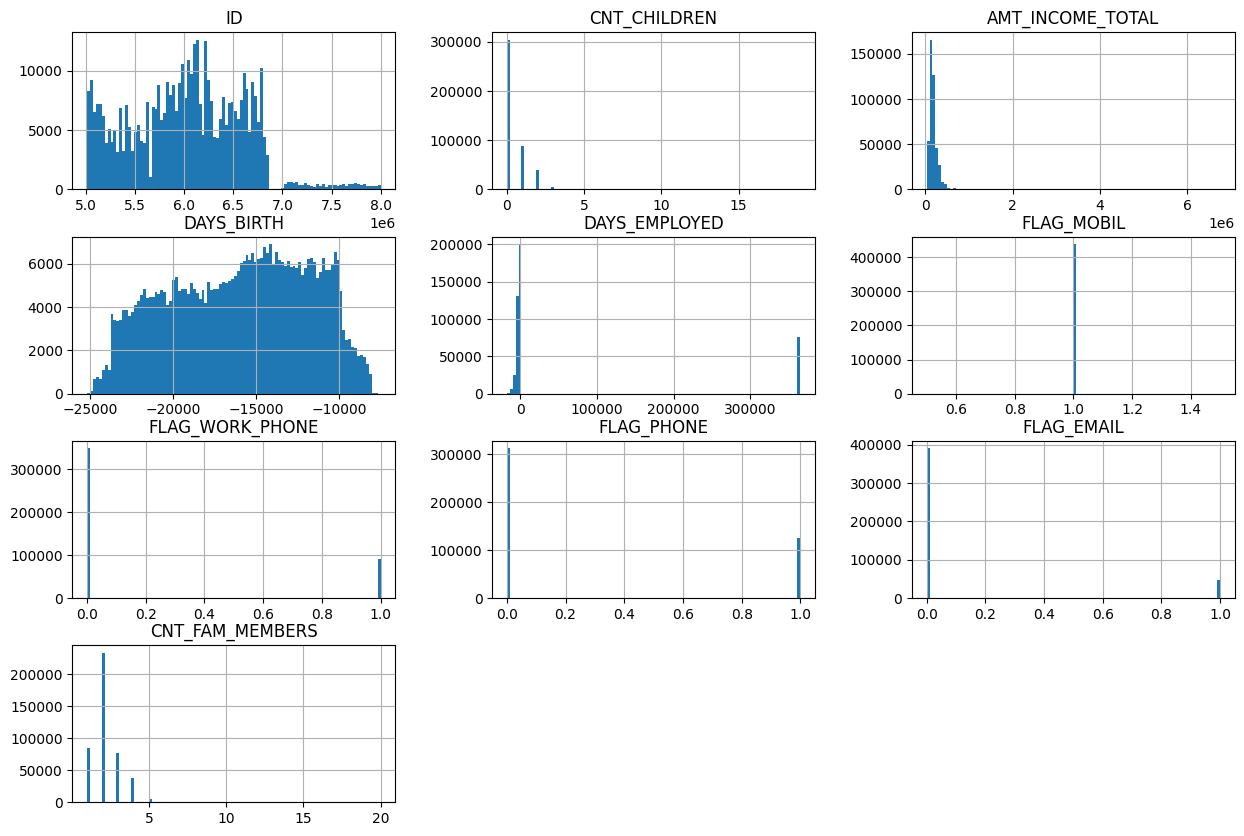

In [ ]:
application.hist(bins=100,figsize=(15,10))
plt.show()

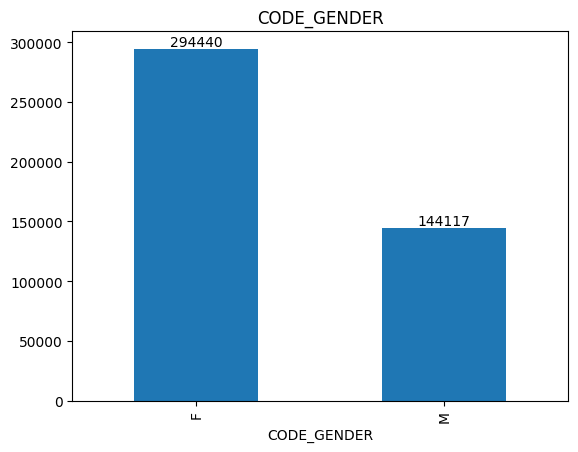

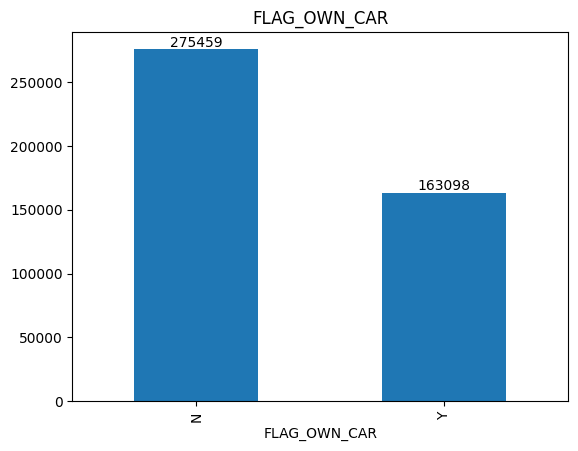

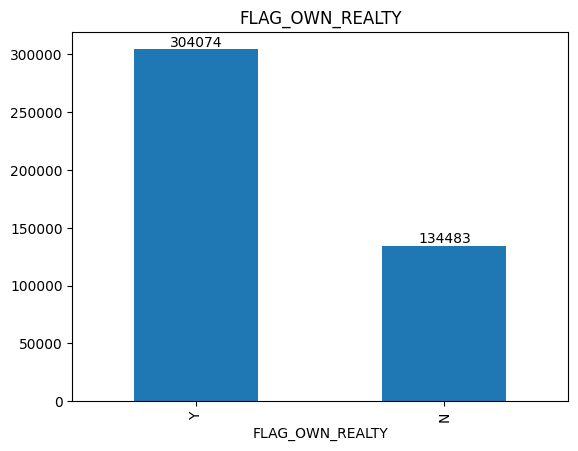

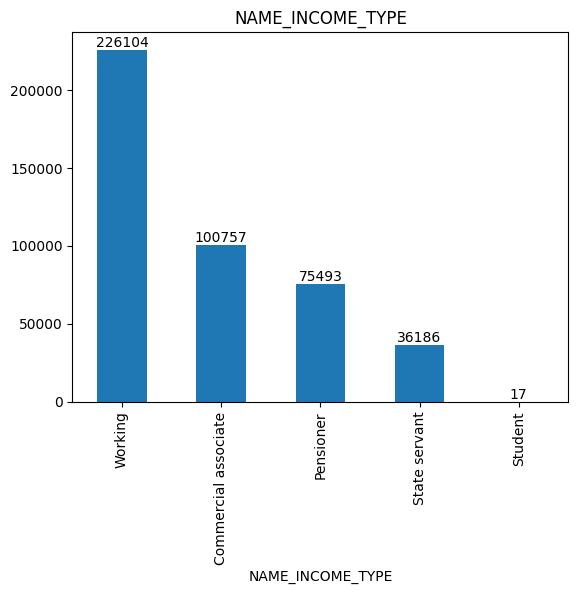

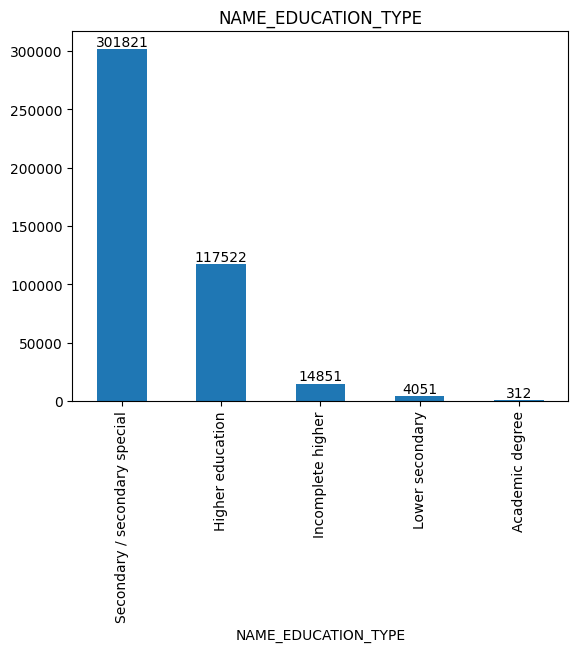

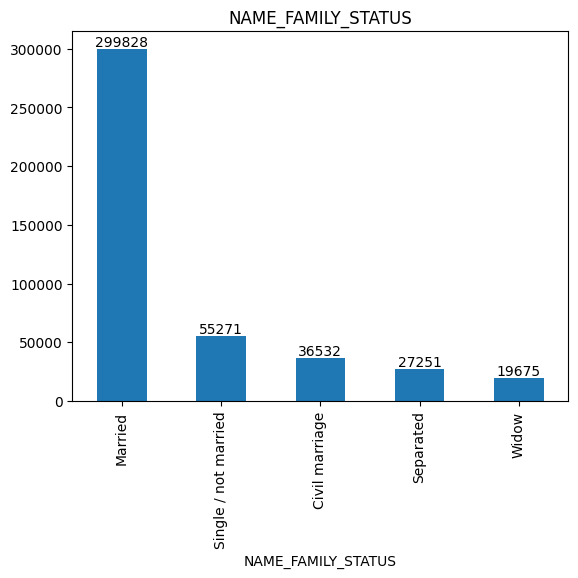

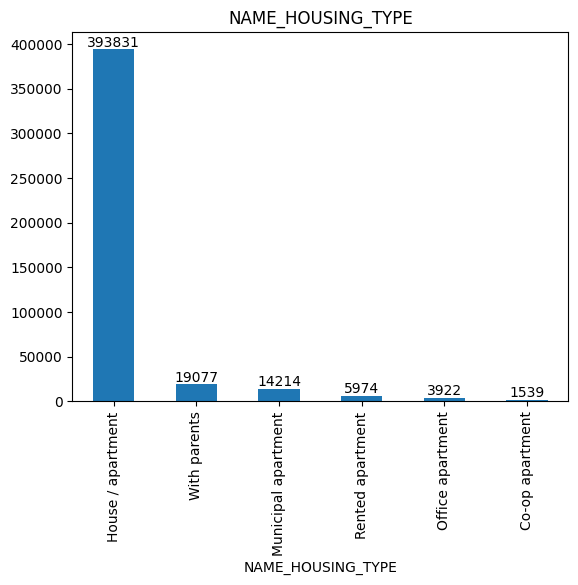

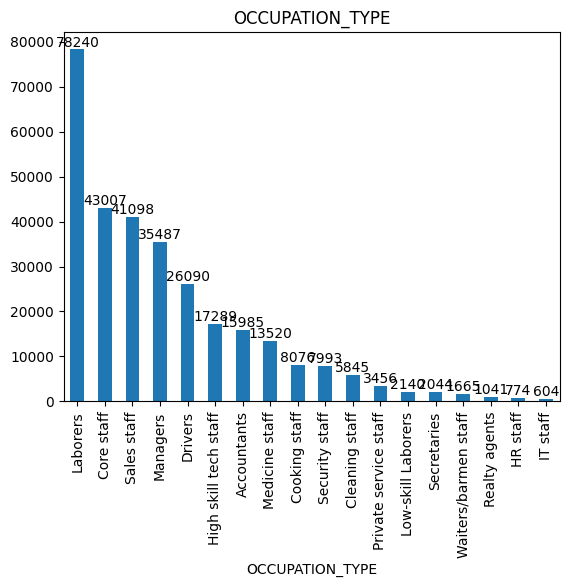

In [ ]:
# display all columns have a datatype "object"
import pandas as pd
import matplotlib.pyplot as plt

def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(application)

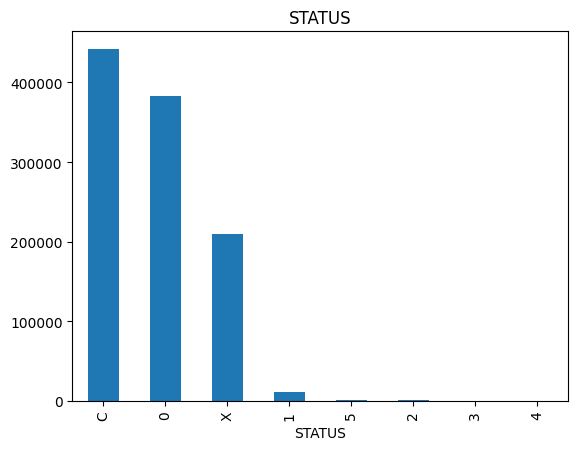

In [ ]:
credit['STATUS'].value_counts().plot(kind='bar')
plt.title('STATUS')
plt.show()

###Đa biến

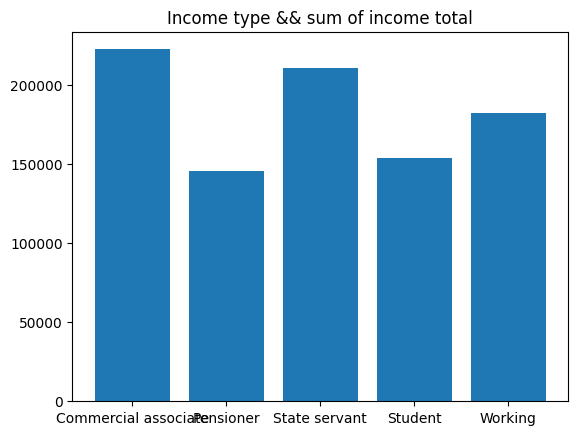

In [ ]:
# pd.pivot_table(application,index='NAME_INCOME_TYPE', values ='AMT_INCOME_TOTAL')
x=['Commercial associate','Pensioner','State servant','Student','Working']
y=[222334,145276,210195,153692,182320]
plt.bar(x,y)
plt.title('Income type && sum of income total')
plt.show()

##2.Feature Engineering:

###DF2:

In [ ]:
grouped = credit.groupby('ID')

In [ ]:
## chuyển đổi dữ liệu tín dụng sang định dạng rộng mà mỗi ID là một hàng
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

In [ ]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [ ]:
# Chuyển 'MONTHS_BALANCE' sang kiểu số
credit['MONTHS_BALANCE'] = pd.to_numeric(credit['MONTHS_BALANCE'], errors='coerce')
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
# Tính 'open_month' bằng giá trị min của 'MONTHS_BALANCE'
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

In [ ]:
#Đặt ID là index
pivot_tb['ID'] = pivot_tb.index
## biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()

In [ ]:
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb.head()

MONTHS_BALANCE,ID,open_month,end_month
ID,,,
5001711,5001711,-3,0
5001712,5001712,-18,0
5001713,5001713,-21,0
5001714,5001714,-14,0
5001715,5001715,-59,0


Mục đích của pivot table là tính được open month và end_month của một tài khoản

In [ ]:
# tính toán cửa sổ quan sát (Độ rộng cuả các tháng quan sát)
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']

In [ ]:
#reset lại index
pivot_tb.reset_index(drop = True, inplace = True)

In [ ]:
# join bảng vừa tạo với bảng credit
credit = pd.merge(credit, pivot_tb, on = 'ID', how = 'left')
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18


In [ ]:
#Label cho những biến mục tiêu mà trên 60 ngày là 1, còn lại là 0
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0)
#
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not-- code convert data sang integer

In [ ]:
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']        # calculate month on book: how many months after opening account- (or:  the number of months that have completed since the loan origination Date)
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit0 = credit.copy()
credit0.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
3,5001711,-3,0,-3,0,3,0,0
2,5001711,-2,0,-3,0,3,0,1
1,5001711,-1,0,-3,0,3,0,2
0,5001711,0,X,-3,0,3,0,3
22,5001712,-18,0,-18,0,18,0,0


In [ ]:
# count how many users in every month the account was opened
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']})
'''

    pivot_tb.groupby(['open_month']): Groups the DataFrame pivot_tb by the values in the 'open_month' column. This creates a GroupBy object that allows you to perform operations on each group separately.

    .agg({'ID': ['count']}): Applies the aggregation function count to the 'ID' column for each group. This counts the number of occurrences of each unique 'ID' within each 'open_month' group.

    denominator = ...: Assigns the result of the grouping and aggregation to the variable denominator. This means denominator will be a DataFrame or Series containing the counts of 'ID' for each 'open_month'.
'''
denominator.reset_index(inplace = True)
''''''
denominator.columns = ['open_month','sta_sum']

print(denominator)

    open_month  sta_sum
0          -60      415
1          -59      406
2          -58      440
3          -57      400
4          -56      470
..         ...      ...
56          -4      874
57          -3      919
58          -2      771
59          -1      686
60           0      370

[61 rows x 2 columns]


In [ ]:
credit['application_status'] = credit.groupby('ID')['status'].transform('max')
'''

    credit.groupby('ID')['status']: Groups the DataFrame by the 'ID' column and selects the 'status' column within each group.

    .transform('max'): Applies the max function to each group of the 'status' column. This calculates the maximum value of 'status' for each unique 'ID'.

    credit['application_status'] = ...: Assigns the result of the grouping, transformation, and maximum calculation to a new column called 'application_status' in the credit DataFrame.
'''
truncate = credit.loc[credit['application_status']==1,]
'''

    credit['application_status']==1: Creates a boolean mask that is True for rows where the value in the 'application_status' column is equal to 1, and False otherwise.

    credit.loc[...]: Uses the boolean mask to select only the rows from the credit DataFrame where the condition credit['application_status']==1 is true.

    truncate = ...: Assigns the resulting subset of the DataFrame to a new variable called truncate.

In essence, this code creates a new DataFrame called truncate that contains only the rows from
the original credit DataFrame where the 'application_status' is equal to 1.
This is essentially filtering the data to focus on a specific subset based on the
'application_status' criterion. '''
not_trunc = credit.loc[credit['application_status']==0,]

print (credit)

              ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
3        5001711              -3      0          -3          0       3   
2        5001711              -2      0          -3          0       3   
1        5001711              -1      0          -3          0       3   
0        5001711               0      X          -3          0       3   
22       5001712             -18      0         -18          0      18   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  application_status  
3             0              0                   0  
2    

In [ ]:
truncate.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book,application_status
8920,5002126,-55,0,-55,0,55,0,0,1
8919,5002126,-54,0,-55,0,55,0,1,1
8918,5002126,-53,X,-55,0,55,0,2,1
8917,5002126,-52,X,-55,0,55,0,3,1
8916,5002126,-51,1,-55,0,55,0,4,1


In [ ]:
not_trunc

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book,application_status
3,5001711,-3,0,-3,0,3,0,0,0
2,5001711,-2,0,-3,0,3,0,1,0
1,5001711,-1,0,-3,0,3,0,2,0
0,5001711,0,X,-3,0,3,0,3,0
22,5001712,-18,0,-18,0,18,0,0,0
...,...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25,0
1048548,5150487,-3,C,-29,0,29,0,26,0
1048547,5150487,-2,C,-29,0,29,0,27,0
1048546,5150487,-1,C,-29,0,29,0,28,0


In [ ]:
# Assuming not_trunc and truncate are your DataFrames
dt1 = not_trunc.groupby('ID').agg({
    'month_on_book': ['max'],
    'application_status': ['max']
})
dt1.reset_index(inplace=True)
dt1.columns = ['ID', 'month_on_book', 'application_status']

dt2 = truncate.loc[truncate['status'] == 1].groupby('ID').agg({
    'month_on_book': ['min'],
    'application_status': ['max']
})
dt2.reset_index(inplace=True)
dt2.columns = ['ID', 'month_on_book', 'application_status']

# Concatenate dt1 and dt2 vertically
dt = pd.concat([dt1, dt2], ignore_index=True)

print(dt)

            ID  month_on_book  application_status
0      5001711              3                   0
1      5001712             18                   0
2      5001713             21                   0
3      5001714             14                   0
4      5001715             59                   0
...        ...            ...                 ...
45980  5149834              8                   1
45981  5149838              8                   1
45982  5150049              9                   1
45983  5150238             48                   1
45984  5150337              3                   1

[45985 rows x 3 columns]


In [ ]:
dt = pd.merge(dt, application, on = 'ID', how = 'left')
dt.fillna('unknown',inplace=True)
pd.options.display.max_rows = 999
print(dt)

            ID  month_on_book  application_status CODE_GENDER FLAG_OWN_CAR  \
0      5001711              3                   0     unknown      unknown   
1      5001712             18                   0     unknown      unknown   
2      5001713             21                   0     unknown      unknown   
3      5001714             14                   0     unknown      unknown   
4      5001715             59                   0     unknown      unknown   
...        ...            ...                 ...         ...          ...   
45980  5149834              8                   1           F            N   
45981  5149838              8                   1           F            N   
45982  5150049              9                   1           F            N   
45983  5150238             48                   1           F            Y   
45984  5150337              3                   1           M            N   

      FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL      NAME_I

/tmp/ipython-input-1440047925.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dt.fillna('unknown',inplace=True)


In [ ]:
df2=dt.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   45985 non-null  int64 
 1   month_on_book        45985 non-null  int64 
 2   application_status   45985 non-null  int8  
 3   CODE_GENDER          45985 non-null  object
 4   FLAG_OWN_CAR         45985 non-null  object
 5   FLAG_OWN_REALTY      45985 non-null  object
 6   CNT_CHILDREN         45985 non-null  object
 7   AMT_INCOME_TOTAL     45985 non-null  object
 8   NAME_INCOME_TYPE     45985 non-null  object
 9   NAME_EDUCATION_TYPE  45985 non-null  object
 10  NAME_FAMILY_STATUS   45985 non-null  object
 11  NAME_HOUSING_TYPE    45985 non-null  object
 12  DAYS_BIRTH           45985 non-null  object
 13  DAYS_EMPLOYED        45985 non-null  object
 14  FLAG_MOBIL           45985 non-null  object
 15  FLAG_WORK_PHONE      45985 non-null  object
 16  FLAG

In [ ]:
df2.describe()

,ID,month_on_book,application_status
count,4.598500e+04,45985.000000,45985.000000
mean,5.070164e+06,21.467805,0.014505
std,4.543364e+04,15.400588,0.119560
min,5.001711e+06,0.000000,0.000000
25%,5.026147e+06,9.000000,0.000000
50%,5.065737e+06,18.000000,0.000000
75%,5.114024e+06,32.000000,0.000000
max,5.150487e+06,60.000000,1.000000


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'month_on_book'}>],
       [<Axes: title={'center': 'application_status'}>, <Axes: >]],
      dtype=object)

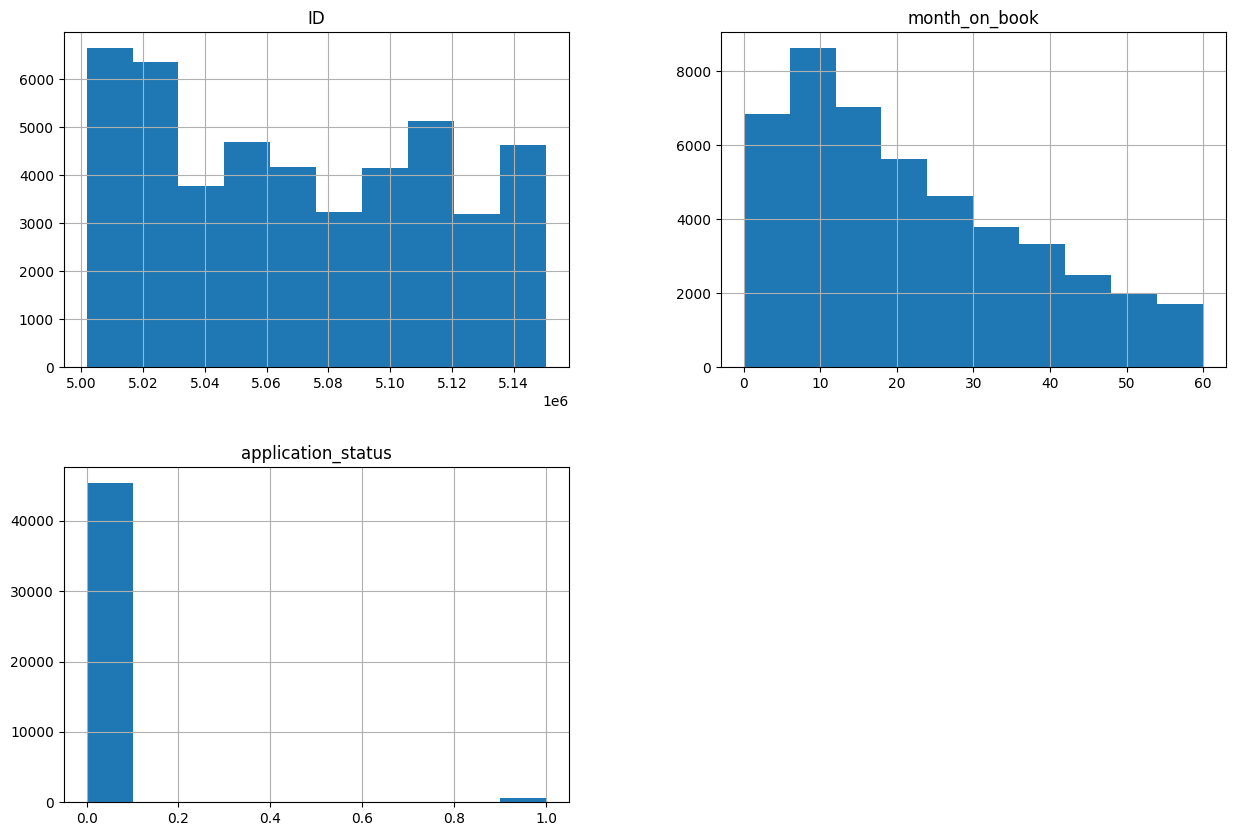

In [ ]:
df2.hist(figsize=(15,10))

###df3

In [ ]:
# # # Handling the missing values in  dataset----------------
# Replace the 'unknown's with NaN
cc_apps = df2.replace('unknown', np.nan)
df3=cc_apps.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   45985 non-null  int64  
 1   month_on_book        45985 non-null  int64  
 2   application_status   45985 non-null  int8   
 3   CODE_GENDER          36457 non-null  object 
 4   FLAG_OWN_CAR         36457 non-null  object 
 5   FLAG_OWN_REALTY      36457 non-null  object 
 6   CNT_CHILDREN         36457 non-null  float64
 7   AMT_INCOME_TOTAL     36457 non-null  float64
 8   NAME_INCOME_TYPE     36457 non-null  object 
 9   NAME_EDUCATION_TYPE  36457 non-null  object 
 10  NAME_FAMILY_STATUS   36457 non-null  object 
 11  NAME_HOUSING_TYPE    36457 non-null  object 
 12  DAYS_BIRTH           36457 non-null  float64
 13  DAYS_EMPLOYED        36457 non-null  float64
 14  FLAG_MOBIL           36457 non-null  float64
 15  FLAG_WORK_PHONE      36457 non-null 

/tmp/ipython-input-1901778625.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cc_apps = df2.replace('unknown', np.nan)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Convert the non-numeric data into numeric--------
# Iterate over all the values of each column and extract their dtypes
for col in df3.columns:
    # Compare if the dtype is object
    if df3[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df3[col]=le.fit_transform(df3[col])

print(df3.info())
credit_processing  = df3.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   45985 non-null  int64  
 1   month_on_book        45985 non-null  int64  
 2   application_status   45985 non-null  int8   
 3   CODE_GENDER          45985 non-null  int64  
 4   FLAG_OWN_CAR         45985 non-null  int64  
 5   FLAG_OWN_REALTY      45985 non-null  int64  
 6   CNT_CHILDREN         36457 non-null  float64
 7   AMT_INCOME_TOTAL     36457 non-null  float64
 8   NAME_INCOME_TYPE     45985 non-null  int64  
 9   NAME_EDUCATION_TYPE  45985 non-null  int64  
 10  NAME_FAMILY_STATUS   45985 non-null  int64  
 11  NAME_HOUSING_TYPE    45985 non-null  int64  
 12  DAYS_BIRTH           36457 non-null  float64
 13  DAYS_EMPLOYED        36457 non-null  float64
 14  FLAG_MOBIL           36457 non-null  float64
 15  FLAG_WORK_PHONE      36457 non-null 

##Modeling & Đánh giá


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

###Chọn biến thủ công

In [ ]:
# Drop unnecessary columns
df3 = df3.drop(columns=["ID", "CNT_CHILDREN", "NAME_HOUSING_TYPE", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])

In [ ]:
column_names = ["month_on_book", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "AMT_INCOME_TOTAL",
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "DAYS_BIRTH", "DAYS_EMPLOYED",
                "FLAG_MOBIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "application_status"]
df3 = df3.reindex(columns=column_names)

In [ ]:
# Separate features and target
X, y = df3.iloc[:, :-1], df3.iloc[:, -1]

# Handle missing values (NaN) - You can customize this based on your preference
X.fillna(X.mean(), inplace=True)

In [ ]:
# Create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)

# Concatenate the resampled data with the majority class
X_balanced = pd.concat([X[y == 0], X_resampled])
y_balanced = pd.concat([y[y == 0], y_resampled])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####logistic model

In [ ]:
# Fit a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy of logistic regression classifier:", accuracy)

Accuracy of logistic regression classifier: 0.6877206531332745


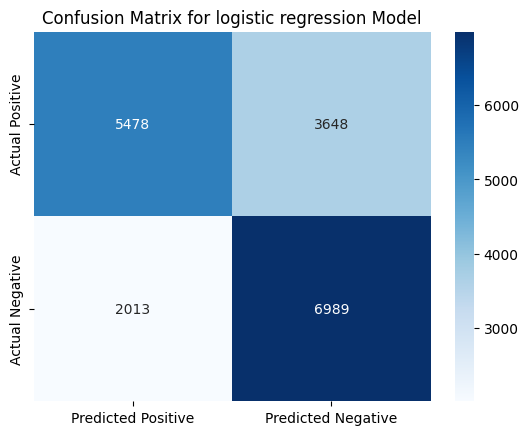

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your confusion matrix
conf_matrix = conf_matrix

# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
print("Precition   using LG  on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred),4)*100))
print("Recall      using LG  on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred),4)*100))
print("Accurcy     using LG  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))

Precition   using LG  on test Data  : 65.70 %
Recall      using LG  on test Data  : 77.64 %
Accurcy     using LG  on test Data  : 68.77 %


####Random forest

In [ ]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42)

In [ ]:
random_f.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = random_f.predict(X_test_scaled)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Accuracy of Random Forest classifier: 0.9707082965578111
Confusion Matrix for Random Forest:
[[8881  245]
 [ 286 8716]]


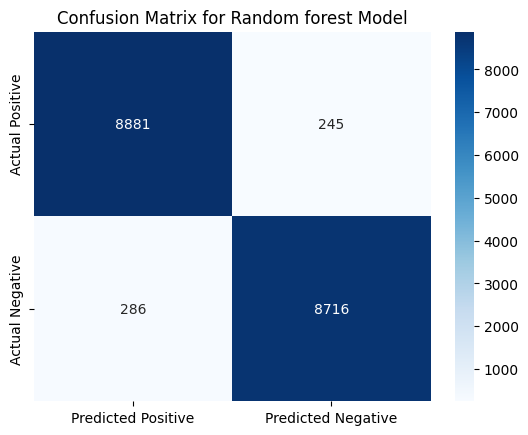

In [ ]:
# Your confusion matrix
conf_matrix = conf_matrix_rf

conf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()

In [ ]:
print("Precition   using LG  on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred_rf),4)*100))
print("Recall      using LG  on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred_rf),4)*100))
print("Accurcy     using LG  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_rf),4)*100))

Precition   using LG  on test Data  : 97.27 %
Recall      using LG  on test Data  : 96.82 %
Accurcy     using LG  on test Data  : 97.07 %


###Chọn biến độc lập có đánh giá mức độ tác động đến biến mục tiêu

In [ ]:
df5=credit_processing.copy()

In [ ]:
X = df5.drop(['application_status'], axis=1)
y = df5['application_status']
# Handle missing values (NaN) - You can customize this based on your preference
X.fillna(X.mean(), inplace=True)

In [ ]:
# Impute missing values in y_train (replace with the appropriate strategy)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='most_frequent')  # Replace with your desired strategy
#y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape for the imputer

In [ ]:
# Create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)

# Concatenate the resampled data with the majority class
X_balanced = pd.concat([X[y == 0], X_resampled])
y_balanced = pd.concat([y[y == 0], y_resampled])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced , test_size = 0.33, random_state = 42)

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((60726, 19), (29910, 19))

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9971


In [ ]:
# view the feature scores

feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores


,0
month_on_book,0.276612
ID,0.187403
DAYS_BIRTH,0.103656
DAYS_EMPLOYED,0.089998
AMT_INCOME_TOTAL,0.079909
OCCUPATION_TYPE,0.045410
NAME_INCOME_TYPE,0.027517
NAME_FAMILY_STATUS,0.024987
NAME_EDUCATION_TYPE,0.024223
CNT_FAM_MEMBERS,0.021522


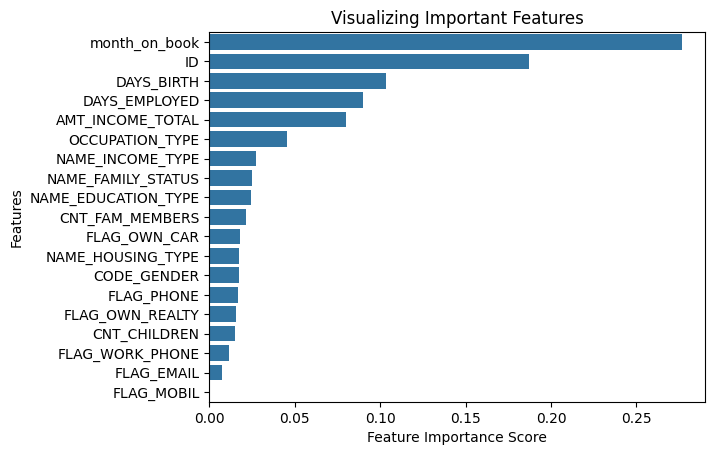

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [ ]:
X1 = df5.drop(['application_status', 'ID','CNT_CHILDREN','FLAG_PHONE','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','FLAG_EMAIL','FLAG_MOBIL','NAME_HOUSING_TYPE','CODE_GENDER'], axis=1)
y1 = df5['application_status']
# Handle missing values (NaN) - You can customize this based on your preference
X1.fillna(X.mean(), inplace=True)

In [ ]:
# Create a balanced dataset by oversampling the minority class
X_resampled1, y_resampled1 = resample(X1[y == 1], y1[y == 1], replace=True, n_samples=X1[y == 0].shape[0], random_state=42)
# Concatenate the resampled data with the majority class
X_balanced1 = pd.concat([X1[y == 0], X_resampled1])
y_balanced1 = pd.concat([y1[y == 0], y_resampled1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced1, y_balanced1, test_size = 0.33, random_state = 42)

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9697


In [ ]:
cm = confusion_matrix(y_test, y_pred_100)

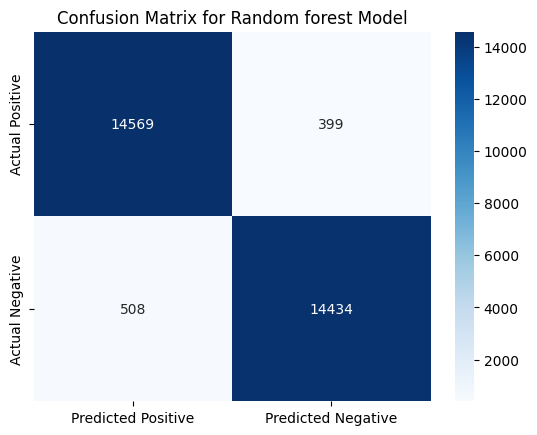

In [ ]:
conf_matrix = cm

conf_df = pd.DataFrame(cm, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()

In [ ]:
print("Precition   using LG  on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred_100),4)*100))
print("Recall      using LG  on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred_100),4)*100))
print("Accurcy     using LG  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_100),4)*100))

Precition   using LG  on test Data  : 97.31 %
Recall      using LG  on test Data  : 96.60 %
Accurcy     using LG  on test Data  : 96.97 %


Accuracy of logistic regression classifier: 0.6917084587094617
Confusion Matrix:
[[ 8794  6174]
 [ 3047 11895]]


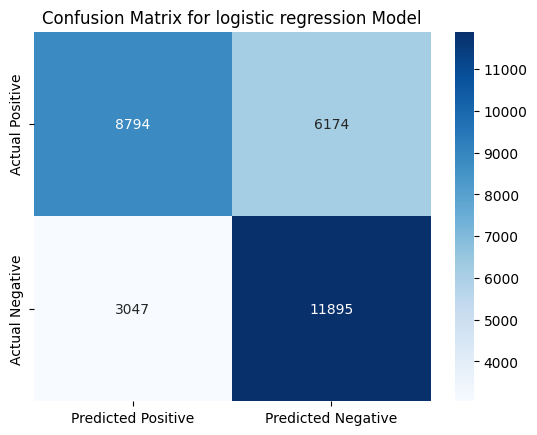

In [ ]:
##Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of logistic regression classifier:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Your confusion matrix
conf_matrix = conf_matrix

# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()

In [ ]:
print("Precition   using LG  on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred),4)*100))
print("Recall      using LG  on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred),4)*100))
print("Accurcy     using LG  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))

Precition   using LG  on test Data  : 65.83 %
Recall      using LG  on test Data  : 79.61 %
Accurcy     using LG  on test Data  : 69.17 %


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)
import numpy as np
import matplotlib.pyplot as plt

# Tự động chọn dữ liệu đã scale (nếu có), nếu không sẽ dùng dữ liệu gốc
try:
    X_tr = X_train_scaled
    X_te = X_test_scaled
except NameError:
    X_tr = X_train
    X_te = X_test


In [ ]:
# Khởi tạo model XGBoost (cấu hình an toàn, chạy nhanh & ổn định)
xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    reg_lambda=1.0,
    tree_method="hist",
    eval_metric="logloss"
)


In [ ]:
# Huấn luyện
xgb_clf.fit(X_tr, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
# Dự đoán
y_pred = xgb_clf.predict(X_te)

In [ ]:
# ====== Metrics yêu cầu ======
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)

print("=== XGBoost Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))


=== XGBoost Metrics ===
Accuracy : 0.6917
Precision: 0.6583
Recall   : 0.7961

Classification report:
              precision    recall  f1-score   support

           0     0.7427    0.5875    0.6560     14968
           1     0.6583    0.7961    0.7207     14942

    accuracy                         0.6917     29910
   macro avg     0.7005    0.6918    0.6884     29910
weighted avg     0.7005    0.6917    0.6883     29910



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix (TN FP / FN TP):")
print(cm)


Confusion Matrix (TN FP / FN TP):
[[ 8794  6174]
 [ 3047 11895]]


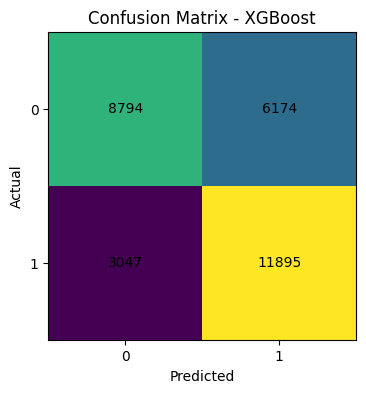

In [ ]:
# Vẽ Confusion Matrix (đơn giản, dễ nhìn)
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title("Confusion Matrix - XGBoost")
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

# Nếu bạn đã scale thì sẽ dùng X_train_scaled, X_test_scaled
try:
    X_tr, X_te = X_train_scaled, X_test_scaled
except NameError:
    X_tr, X_te = X_train, X_test

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_tr, y_train)
y_pred_logreg = log_reg.predict(X_te)

# 2. Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_tr, y_train)
y_pred_rf = rf_clf.predict(X_te)

# 3. XGBoost
xgb_clf = XGBClassifier(
    n_estimators=500, max_depth=6, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=-1, reg_lambda=1.0,
    tree_method="hist", eval_metric="logloss"
)
xgb_clf.fit(X_tr, y_train)
y_pred_xgb = xgb_clf.predict(X_te)

# Gom tất cả kết quả dự đoán vào 1 DataFrame
pred_results = pd.DataFrame({
    "Actual"         : y_test.reset_index(drop=True),
    "LogisticRegression" : y_pred_logreg,
    "RandomForest"   : y_pred_rf,
    "XGBoost"        : y_pred_xgb
})

# In ra 20 dòng đầu để xem
print(pred_results.head(20))


    Actual  LogisticRegression  RandomForest  XGBoost
0        1                   1             1        1
1        1                   0             1        1
2        0                   0             0        0
3        0                   0             0        0
4        1                   1             1        1
5        1                   1             1        1
6        1                   0             1        1
7        1                   1             1        1
8        0                   0             0        0
9        1                   1             1        1
10       1                   1             1        1
11       1                   1             1        1
12       1                   1             1        1
13       1                   1             1        1
14       1                   1             1        1
15       0                   0             0        0
16       1                   1             1        1
17       0                  

In [ ]:
import pandas as pd

# Đổi nhãn 0/1 sang chữ
map_label = {0: "Safe", 1: "Risk"}

# Nếu X_test có cột "ID" thì lấy, không thì dùng index
if "ID" in X_test.columns:
    ids = X_test["ID"].reset_index(drop=True)
else:
    ids = pd.Series(y_test.index, name="ID")

# Tạo DataFrame kết quả
pred_results = pd.DataFrame({
    "ID_KhachHang"      : ids,
    "Thực tế"           : y_test.reset_index(drop=True).map(map_label),
    "LogisticRegression": pd.Series(y_pred_logreg).map(map_label),
    "RandomForest"      : pd.Series(y_pred_rf).map(map_label),
    "XGBoost"           : pd.Series(y_pred_xgb).map(map_label)
})

# Hiển thị 20 dòng đầu
print(pred_results.head(20))



    ID_KhachHang Thực tế LogisticRegression RandomForest XGBoost
0          45500    Risk               Risk         Risk    Risk
1          45727    Risk               Safe         Risk    Risk
2          41506    Safe               Safe         Safe    Safe
3          43823    Safe               Safe         Safe    Safe
4          45968    Risk               Risk         Risk    Risk
5          45796    Risk               Risk         Risk    Risk
6          45549    Risk               Safe         Risk    Risk
7          45557    Risk               Risk         Risk    Risk
8          30179    Safe               Safe         Safe    Safe
9          45443    Risk               Risk         Risk    Risk
10         45531    Risk               Risk         Risk    Risk
11         45898    Risk               Risk         Risk    Risk
12         45480    Risk               Risk         Risk    Risk
13         45409    Risk               Risk         Risk    Risk
14         45772    Risk 